In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# 0. Preamble

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# notebook_path = '/content/drive/MyDrive/Colab_Notebooks/ISER/code/'
# os.chdir(notebook_path)

In [4]:
data = pd.read_csv("../raw_data/global_crisis_data_country.csv", encoding='unicode_escape')
data.drop(0, inplace = True)
data.shape

(15190, 27)

In [5]:
data.rename(columns={'Banking Crisis ':'banking_crisis',
                    'Systemic Crisis':'systemic_crisis',
                    'Banking_Crisis_Notes':'notes',
                    'Currency Crises':'currency_crisis',
                    'Inflation Crises':'inflation_crisis',
                    'Gold Standard':'gold_standard',
                    'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors': 'sovereign_external_debt_1',
                    'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors': 'sovereign_external_debt_2',
                    'Inflation, Annual percentages of average consumer prices':'annual_inflation'},
            inplace = True)

data['Year'] = data['Year'].astype(int)

columns_to_convert = ['banking_crisis', 'systemic_crisis', 'annual_inflation', 'currency_crisis', 'inflation_crisis']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [6]:
GDP_pc = pd.read_csv('../raw_data/gdp-per-capita-maddison.csv')
GDP_pc.drop(columns='417485-annotations', inplace = True)
GDP_pc.rename(columns={'GDP per capita':'GDP_per_capita'}, inplace = True)

# 1. Selecting countries for global analysis

In [7]:
from dataset import concat_dataset
from dataset import dummy_variable

In [89]:
# List of countries
OECD = ['DEU', 'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'KOR', 'DNK', 'ESP', 'USA', 'FIN', 'FRA', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'JPN', 'MEX', 'NOR', 'NZL', 'NLD', 'POL', 'PRT', 'GBR', 'SWE', 'CHE', 'TUR']
G7 = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']
G20 = ['DEU', 'CAN', 'FRA', 'GBR', 'JPN', 'ITA', 'USA', 'ZAF', 'SAU', 'RUS', 'CHN', 'ARG', 'BRA', 'IND', 'KOR', 'MEX', 'TUR', 'IDN']
UE = ['DEU', 'FRA', 'AUT', 'BEL', 'DNK', 'ESP', 'NLD', 'POL', 'PRT', 'SWE']
USA = ['USA']

#List for all countries
unique_countries_df1 = set(data['CC3'].unique())
unique_countries_df2 = set(GDP_pc['Code'].unique())
ALL = list(unique_countries_df1.intersection(unique_countries_df2))

#Select a list among those listed above:
countries_selected = ALL
#Create a dataset with the data of the countries of the list
global_data = concat_dataset(GDP_pc, data, countries_selected, 'left')
dummy_variable(global_data)

In [90]:
banking_crisis_only_first_year = global_data[global_data['banking_crisis_only_first_year'] == 1]['Year'].tolist()  #Appending those years to a list
print(f'In this approch, we record {len(banking_crisis_only_first_year)} different crisis event.')

In this approch, we record 191 different crisis event.


In [91]:
from functions import compute_crisis_duration
from functions import length_frequency

In [92]:
crisis_duration = compute_crisis_duration(global_data)
len_freq = length_frequency(crisis_duration)
len_freq

,Length,Count,Number of points
0,1,95,191
1,2,37,96
2,3,16,59
3,4,16,43
4,5,6,27
5,6,4,21
6,7,10,17
7,8,3,7
8,9,1,4
9,10,1,3


# 2. Extracting inflation series

In [93]:
from functions import extract_inflation_series
from functions import normalize_crisis_data

In [94]:
inflation_series = extract_inflation_series(global_data)
norm_inflation_series = normalize_crisis_data(inflation_series)
len(inflation_series)

191

## 2.1 Inflation response to each year of crisis

In [95]:
from visualisation import plot_by_crisis_length
from visualisation import compute_pattern

95


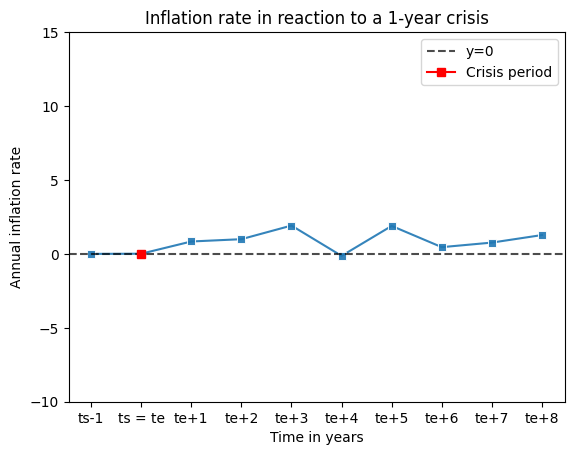

37


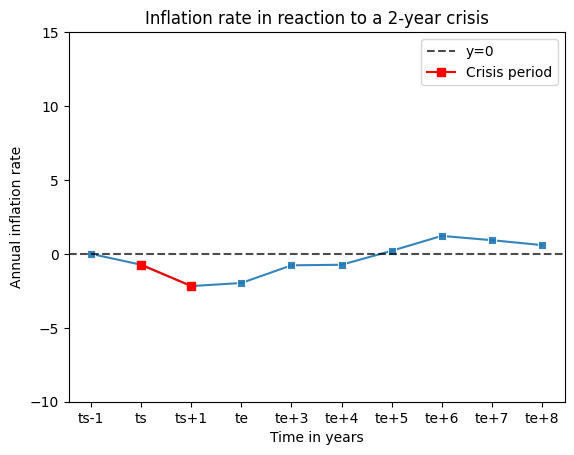

16


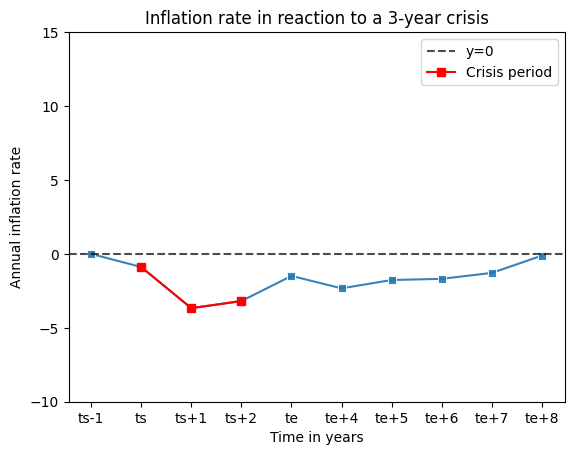

16


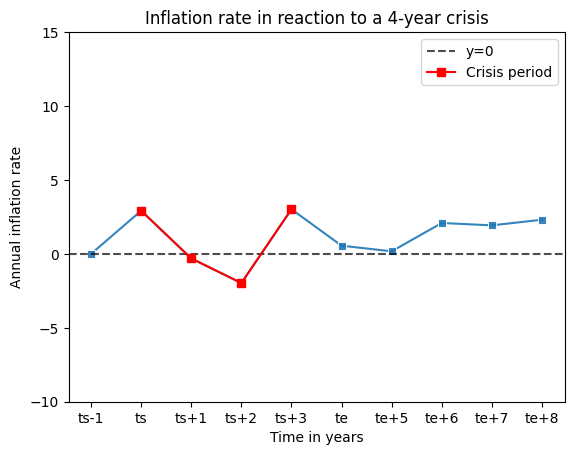

6


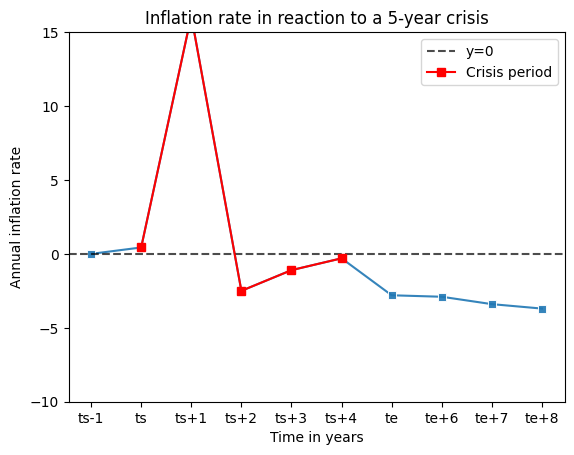

4


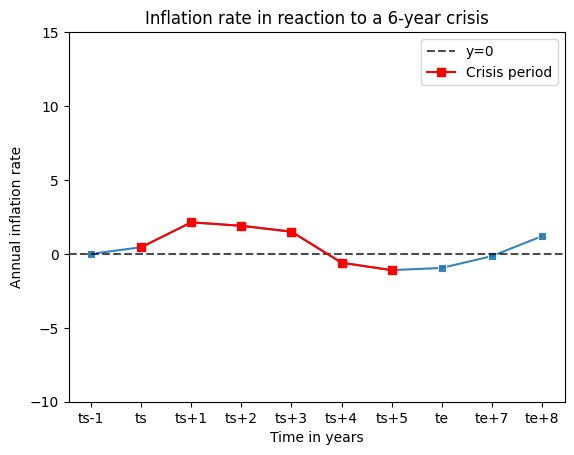

10


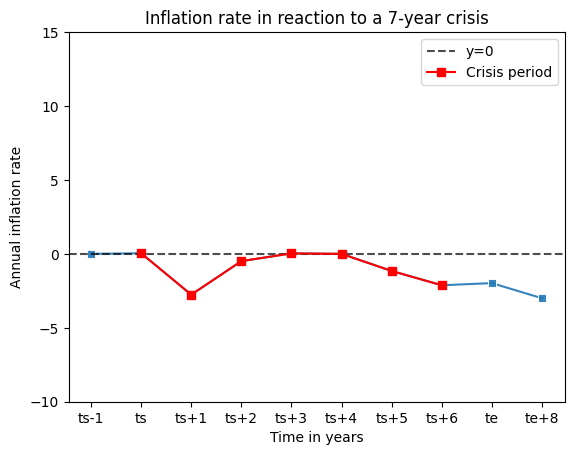

3


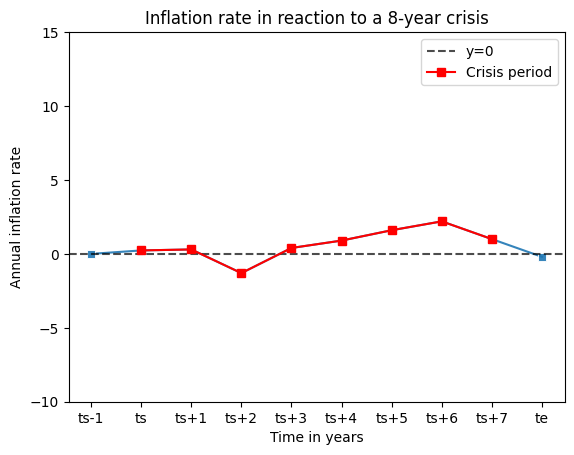

1


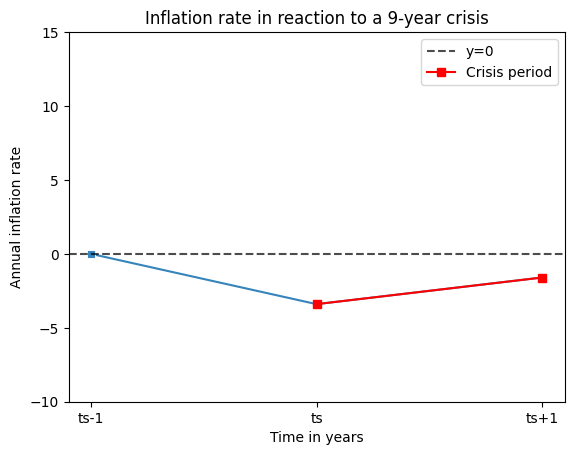

1


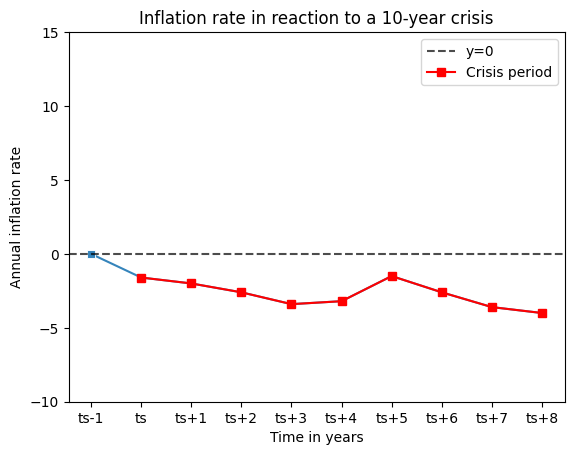

1


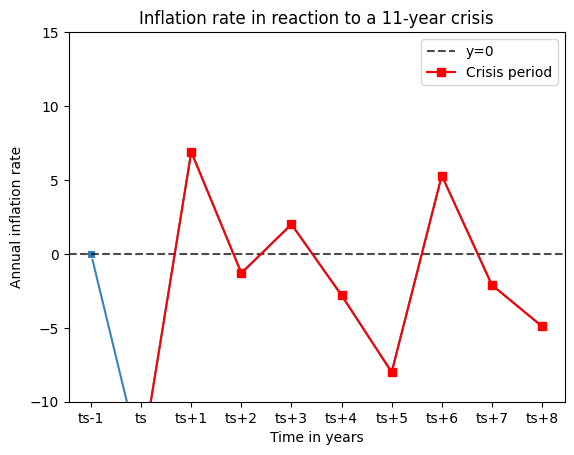

1


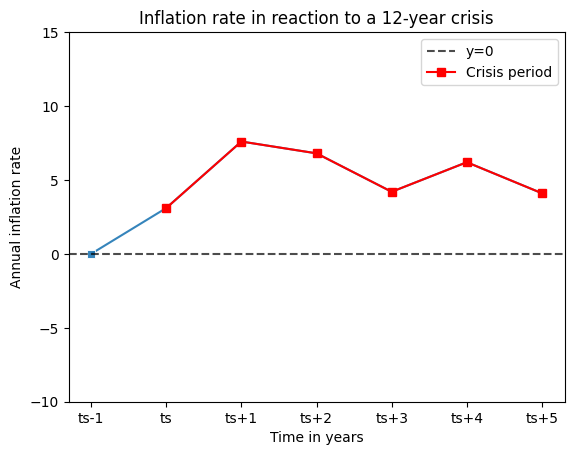

In [96]:
plot_by_crisis_length(norm_inflation_series, crisis_duration, len_freq, 'Inflation rate')

# 3. Extracting output gap series

In [97]:
from functions import extract_output_gap_series

In [98]:
global_data_inner = concat_dataset(GDP_pc, data, countries_selected, 'inner')
dummy_variable(global_data_inner)
global_data_inner

,Case,CC3,Country,Year,banking_crisis,notes,systemic_crisis,gold_standard,exch_usd,exch_usd_alt1,...,<,annual_inflation,Independence,currency_crisis,inflation_crisis,output_gap,banking_crisis_only,excluded_years,banking_crisis_only_first_year,recovery_only
0,41.0,MMR,Myanmar,1820,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0.0,-22.03,0,0,0,0
1,41.0,MMR,Myanmar,1870,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0.0,-21.88,0,0,0,0
2,41.0,MMR,Myanmar,1901,0.0,NaN,0.0,NaN,3.0918,NaN,...,NaN,-3.9,0,0,0.0,8.60,0,0,0,1
3,41.0,MMR,Myanmar,1906,0.0,NaN,0.0,NaN,3.0383,NaN,...,NaN,7.3,0,0,0.0,-11.84,0,0,0,1
4,41.0,MMR,Myanmar,1911,0.0,NaN,0.0,NaN,3.0555,NaN,...,NaN,15.0,0,0,0.0,-5.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,39.0,MEX,Mexico,2012,0.0,NaN,0.0,0,13.0101,13.0101,...,0,4.1,1,0,0.0,2.44,0,0,0,1
9026,39.0,MEX,Mexico,2013,0.0,NaN,0.0,0,13.0765,13.0765,...,0,3.8,1,0,0.0,1.04,0,0,0,1
9027,39.0,MEX,Mexico,2014,0.0,NaN,0.0,0,14.718,14.7180,...,0,4.0,1,0,0.0,0.55,0,0,0,1
9028,39.0,MEX,Mexico,2015,NaN,NaN,NaN,0,17.2,16.4900,...,0,2.7,1,0,0.0,0.48,0,0,0,1


In [99]:
global_data_inner[(global_data_inner['Country']=='Japan') & (global_data_inner['Year'] > 1920)]

,Case,CC3,Country,Year,banking_crisis,notes,systemic_crisis,gold_standard,exch_usd,exch_usd_alt1,...,<,annual_inflation,Independence,currency_crisis,inflation_crisis,output_gap,banking_crisis_only,excluded_years,banking_crisis_only_first_year,recovery_only
1807,34.0,JPN,Japan,1921,0.0,NaN,0.0,0,2.0867,NaN,...,0,-2.2,1,0,0.0,4.41,0,0,0,1
1808,34.0,JPN,Japan,1922,0.0,NaN,0.0,0,2.0471,NaN,...,0,-1.5,1,0,0.0,2.45,0,0,0,1
1809,34.0,JPN,Japan,1923,1.0,NaN,0.0,0,2.1272,NaN,...,0,1.0,1,0,0.0,0.62,1,0,1,0
1810,34.0,JPN,Japan,1924,0.0,NaN,0.0,0,2.6015,NaN,...,0,2.0,1,1,0.0,1.15,0,1,0,0
1811,34.0,JPN,Japan,1925,0.0,NaN,0.0,0,2.3152,NaN,...,0,-1.5,1,0,0.0,2.48,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,34.0,JPN,Japan,2012,0.0,NaN,0.0,0,86.55,NaN,...,0,0.0,1,0,0.0,-2.24,0,0,0,1
1899,34.0,JPN,Japan,2013,0.0,NaN,0.0,0,105.3,NaN,...,0,0.4,1,1,0.0,-0.83,0,1,0,0
1900,34.0,JPN,Japan,2014,0.0,NaN,0.0,0,120.64,NaN,...,0,2.7,1,1,0.0,-1.05,0,1,0,0
1901,34.0,JPN,Japan,2015,NaN,NaN,NaN,0,120.27,NaN,...,0,0.8,1,1,0.0,-0.44,0,1,0,0


In [100]:
banking_crisis_only_first_year = global_data_inner[global_data_inner['banking_crisis_only_first_year'] == 1]['Year'].tolist()  #Appending those years to a list

print(f'In this approch, we record {len(banking_crisis_only_first_year)} different crisis event.')

In this approch, we record 174 different crisis event.


In [101]:
crisis_duration = compute_crisis_duration(global_data_inner)
len_freq = length_frequency(crisis_duration)
len_freq

,Length,Count,Number of points
0,1,88,174
1,2,32,86
2,3,15,54
3,4,13,39
4,5,5,26
5,6,4,21
6,7,10,17
7,8,3,7
8,9,1,4
9,10,1,3


In [102]:
output_gap_series = extract_output_gap_series(global_data_inner)
len(output_gap_series)

174

In [103]:
output_gap_series


[[0.36, -3.05, -5.27, -14.24, -14.73, -14.48, -14.57],
 [5.54, 2.47, 2.76, 4.14, 8.06],
 [1.34, -1.61, -3.03, -1.42, -4.77, -4.33, 2.79, -0.17, -1.15, 0.99, -1.85],
 [-1.74, 1.31, -3.63, 1.67, 2.35, -1.63, 1.83, 3.65, -1.25, -2.65, 6.3],
 [6.3, -1.87, -0.38, -0.08, -3.17, 1.46, -5.0, -2.01, -5.07, -2.24, 1.93],
 [1.07, -6.05, 1.85, 2.27, -5.16, -4.76, 3.35, -5.18, 5.51, 7.63, -2.46],
 [-1.73, 0.69, 3.93, 2.84, 0.15, -2.99, -2.81, -3.46, -3.81],
 [-3.81, -2.83, -1.87, -0.87, 0.25, 0.56, 2.77, -0.82, 2.28, -0.78, 2.4],
 [-0.95, 2.13, 0.11, 2.91, -4.77, 3.16, 10.26, 8.08, -0.82, -1.64, 3.6],
 [20.88, 15.88, 8.07, 0.95, 8.12, 7.04, 4.5],
 [-3.14, -2.77, -2.62, -3.1, -2.64, -0.99, 0.56, 2.61, 2.77, 2.14, 1.3],
 [4.27, 3.07, -1.23, -0.53, 0.33, -0.76, -1.33, -2.33, -2.24, -2.15, -29.62],
 [4.06, 0.39, 1.27, 1.88, -4.73, -8.82, -6.06, -3.85, -2.71, -1.57, -2.67],
 [-3.89, 3.11],
 [2.43, 7.62, 4.0, -0.92, 3.3, -0.29, 2.13, -2.78, 3.28, -0.16, 0.35],
 [-1.05, 0.71, 1.98, 2.29, 0.48, 0.88, -2.56

## 3.1 Output gap response for each length of crisis

88


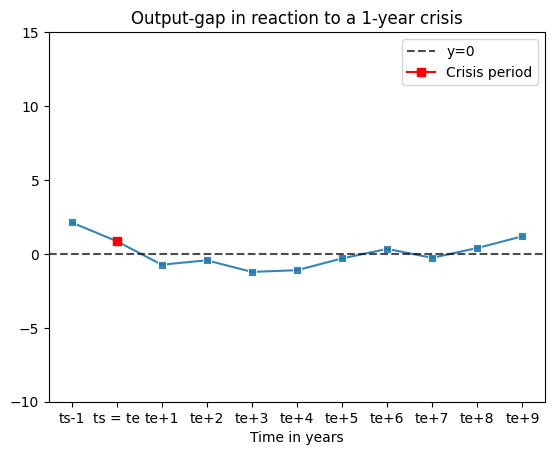

32


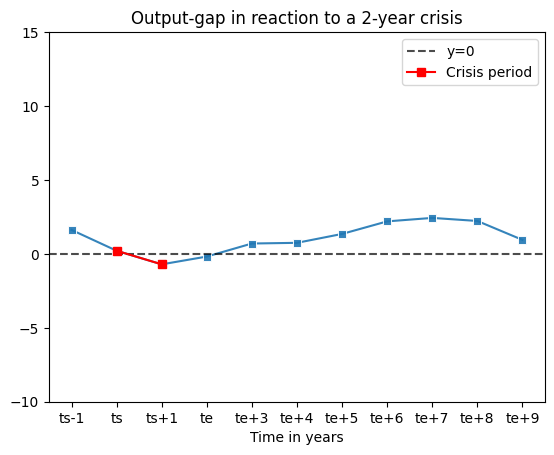

15


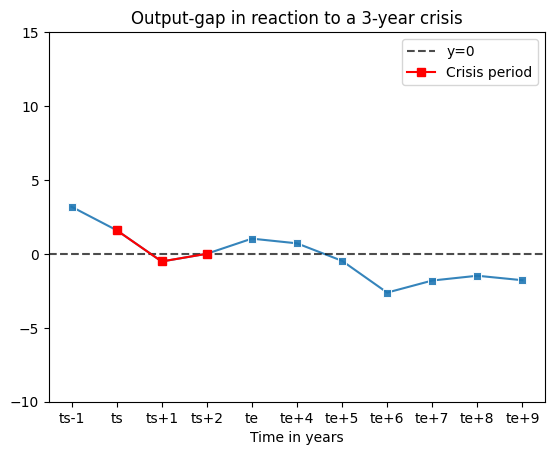

13


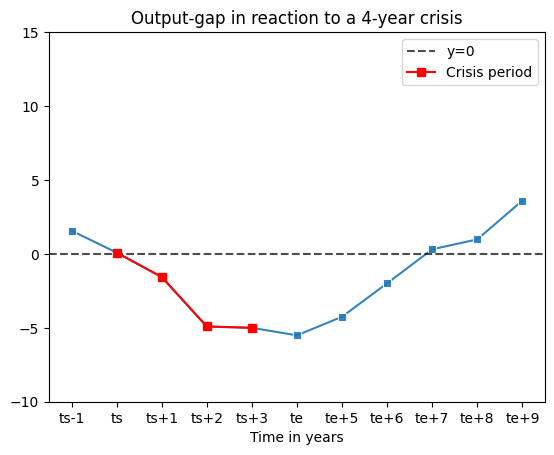

5


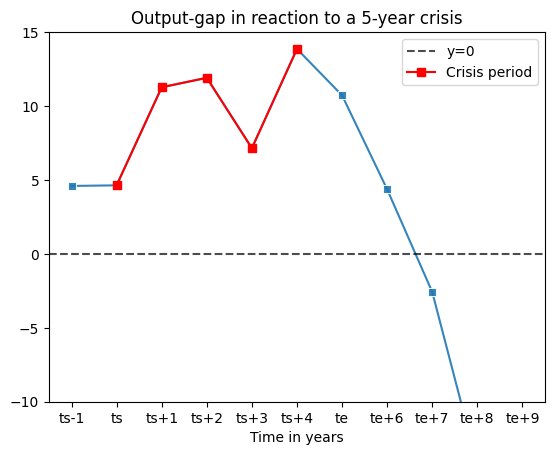

4


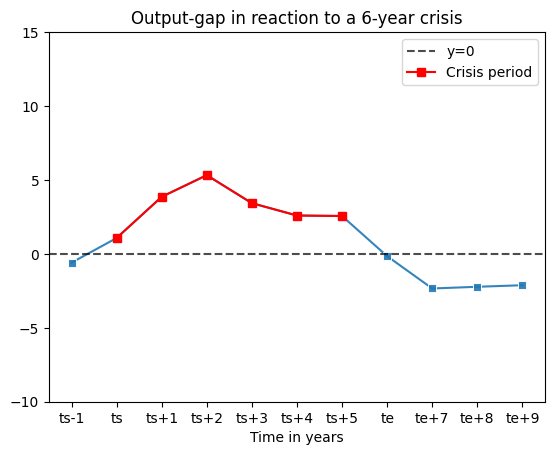

10


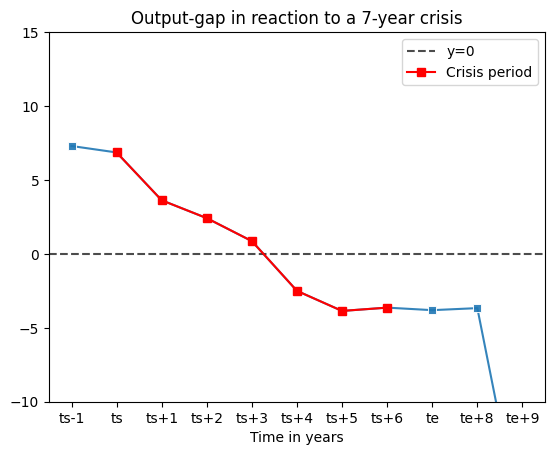

3


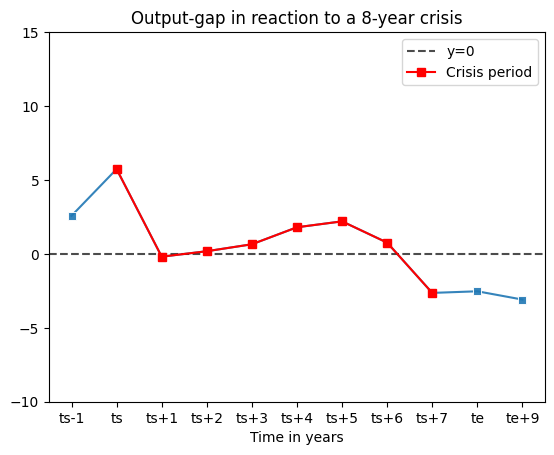

1


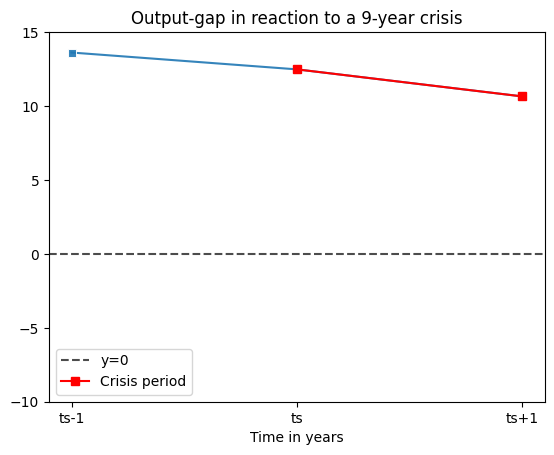

1


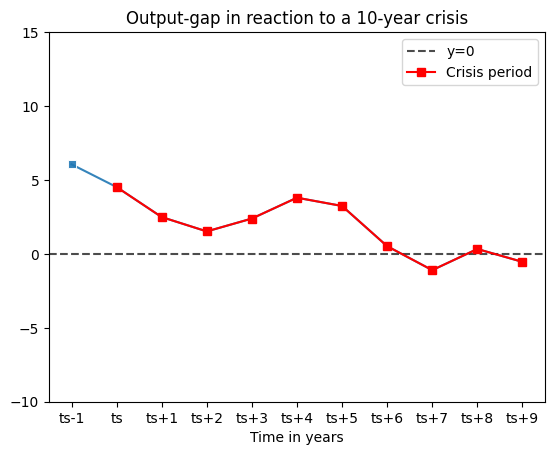

1


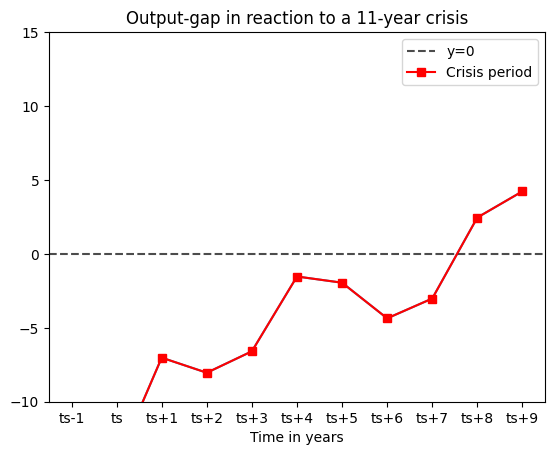

1


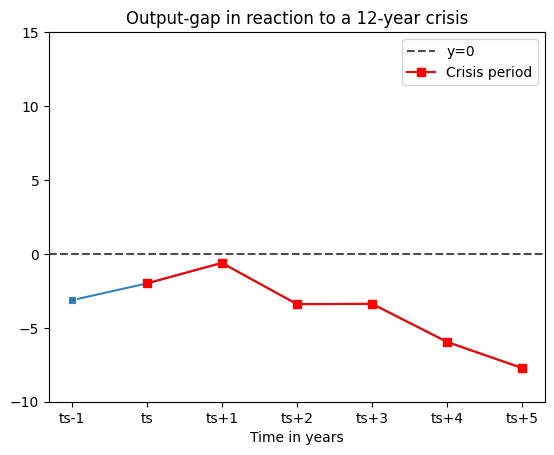

In [104]:
plot_by_crisis_length(output_gap_series, crisis_duration, len_freq, 'Output-gap')

# 4. Crisis & recovery Dynamics in a multiple country database

In [105]:
# from functions import inflation_dynamics
from functions import output_gap_dynamics

In [106]:
from visualisation import plot_dynamics

In [107]:
def inflation_dynamics(data, during_crisis=True):

    ''' This function is extracting the series of the annual inflation rate for each banking crisis or recovery period.
    Input:
    - dataframe
    - during_crisis = True or False (True for the series each banking crisis, False for the series of each recovery period)
    Output:
    - a list of series

    If during_crisis = True:
        The function extracts the series of the inflation rate for time [Ts-1,..., Te]
        s being the year of the beginning ot the crisis, e being the last year of the crisis.
    If during_crisis = False:
        The function extracts the series of the inflation rate for time [Te+1,..., Ts-1]
        e being the last year of the previous crisis, s being the year of the beginning ot the next crisis.
    '''

    series = []
    crisis_started = False
    recovery_started = False
    first_year_appended = False
    excluded_year_during_crisis = False
    excluded_year_during_recovery = False
    crisis_occured = False
    current_serie = []
    previous_year = 0

    for index, row in data.iterrows():
        # Extract the serie only if the value of the value of the inflation rate is not a NaN value
        if not pd.isna(row['annual_inflation']):
            if during_crisis:
                # Extract data during a crisis
                if row['banking_crisis'] == 1:
                    if not crisis_started:
                        crisis_started = True
                        if row['banking_crisis_only_first_year'] == 1:
                            # Append the inflation rate for the year before the crisis
                            if index - 1 >= 0:
                                current_serie.append(data.at[index - 1, 'annual_inflation'])
                            current_serie.append(row['annual_inflation'])
                            first_year_appended = True
                    else:
                        if row['banking_crisis_only'] == 1 and first_year_appended and not excluded_year_during_crisis:
                            # Continue the existing series
                            current_serie.append(row['annual_inflation'])
                        else:
                            excluded_year_during_crisis = True

                elif crisis_started:
                    # End the series when a 0 is recorded in the banking_crisis column
                    crisis_started = False
                    if len(current_serie)>0:
                        series.append(current_serie)
                    current_serie = []
                    first_year_appended = False
                    excluded_year_during_crisis = False
            else:
                # Extract during a non-crisis period
                if row['banking_crisis_only_first_year'] == 1:
                    crisis_occured = True
                elif (row['Year'] - previous_year) < 0:
                    crisis_occured = False

                if row['recovery_only'] == 1:
                    if crisis_occured and not excluded_year_during_recovery:
                        recovery_started = True
                        current_serie.append(row['annual_inflation'])
                elif row['excluded_years'] == 1:
                    excluded_year_during_recovery = True
                elif recovery_started:
                    # End the series when a 0 is recorded in the banking_crisis column
                    recovery_started = False
                    # current_serie = np.array(current_serie)
                    series.append(current_serie)
                    # current_serie = current_serie.tolist()
                    current_serie = []
                    excluded_year_during_recovery = False
                else:
                    excluded_year_during_recovery = False
            previous_year = row['Year']
    return series

In [108]:
inflation_dynamics(global_data, during_crisis = False)

[[4.2, 2.1],
 [13.9, 14.2],
 [14.3, 15.6, 13.7, 9.9, 8.8, 8.7],
 [6.7, -6.3],
 [-2.4, 16.0, 0.4, 2.4, -0.6, 6.4],
 [2.6, -3.4, -1.9, 0.4, -4.1, -0.7, 1.1, 4.7, -4.8],
 [6.3, -2.9, 1.2, -3.5, -1.6, 3.2, 5.3, 5.1],
 [0.0,
  -2.4,
  0.4,
  4.2,
  15.3,
  8.8,
  5.0,
  -1.8,
  -6.3,
  -9.2,
  3.0,
  3.1,
  5.4,
  -5.2,
  1.5,
  -0.5,
  -2.9,
  1.9],
 [-2.5, 1.9, 2.7, 6.3, 0.0, -7.2, -0.9, 1.4, -0.6, -5.1, -0.2, 2.2],
 [-1.1, -4.3, -1.1, 4.0, -6.9, 2.5],
 [-0.7,
  -0.3,
  -4.5,
  -0.7,
  -4.0,
  -2.3,
  -1.2,
  0.1,
  2.9,
  4.1,
  3.8,
  -0.6,
  1.1,
  -1.0,
  -5.4,
  4.4,
  3.6],
 [0.3, 2.3, 3.4, 3.2, 1.8, 0.1, 1.3, 18.5, 16.6],
 [-0.9, -4.9, -3.6],
 [2.1, 1.3, 0.7, 0.6, 1.8, 1.8, 1.9, 2.2, 2.3],
 [0.1, 0.4],
 [1.0, 2.6, 0.5, -1.4, 0.5, 1.5, 2.3, 3.5, 3.4, 2.3, 2.3, 3.1, 1.7, 1.4],
 [5.8,
  2.3,
  -0.6,
  -1.8,
  -3.1,
  -4.4,
  -5.4,
  -3.3,
  2.9,
  5.2,
  1.2,
  4.9,
  1.2,
  -7.7,
  -3.9,
  1.1,
  0.3],
 [4.9, 3.6, 1.4, -2.8, 1.0, 1.4, -1.3, 2.5, 2.6],
 [1.7, -0.7, 0.7, -1.4, 5.2, 1.0

In [109]:
len(inflation_dynamics(global_data, during_crisis = False))

184

191
184


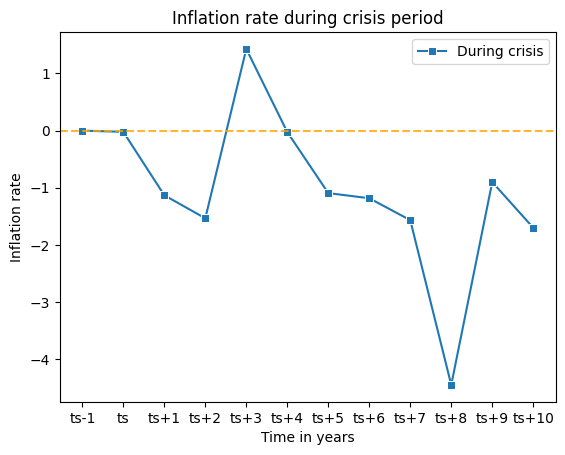

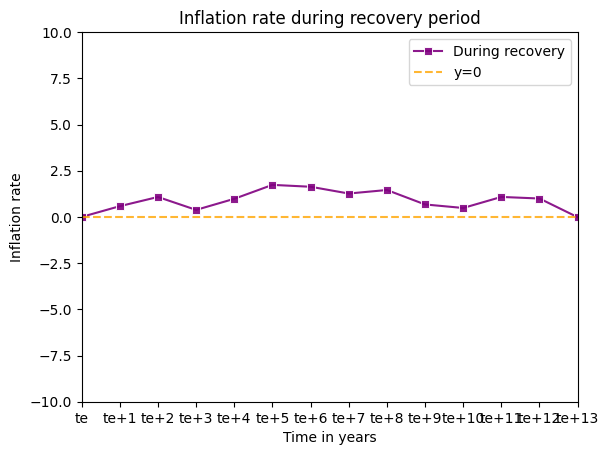

In [110]:
inflation_crisis_series = normalize_crisis_data(inflation_dynamics(global_data, during_crisis = True))
inflation_recovery_series = normalize_crisis_data(inflation_dynamics(global_data, during_crisis = False))
print(len(inflation_crisis_series))
print(len(inflation_recovery_series))
plot_dynamics(inflation_crisis_series, inflation_recovery_series, 'Inflation rate')

174
743


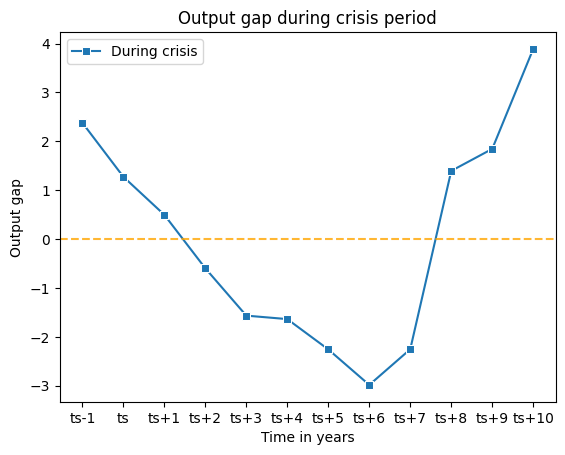

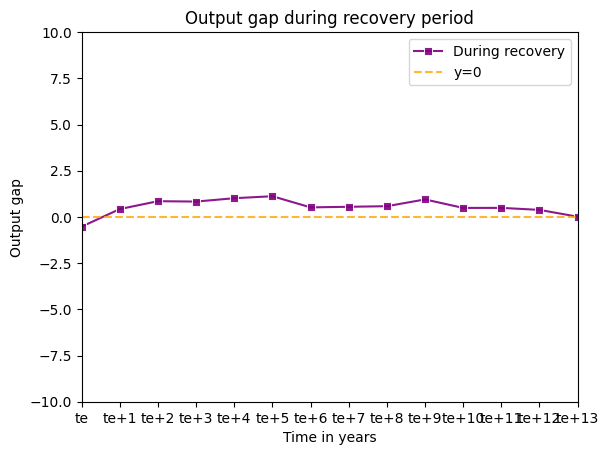

In [111]:
output_gap_crisis_series = output_gap_dynamics(global_data_inner, during_crisis = True)
output_gap_recovery_series = output_gap_dynamics(global_data_inner, during_crisis = False)
print(len(output_gap_crisis_series))
print(len(output_gap_recovery_series))
plot_dynamics(output_gap_crisis_series, output_gap_recovery_series, 'Output gap')